<a href="https://colab.research.google.com/github/mohamedhesham1299/MachineLearning/blob/main/GUC_KNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import csv
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
uploaded = files.upload()

Saving Classified Data to Classified Data


In [5]:

FileName="Classified Data"
data = pd.read_csv(FileName)
data.head(2)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [7]:
sc.fit(data.drop('TARGET CLASS',axis=1))
scaled_features = sc.transform(data.drop('TARGET CLASS',axis=1))

In [8]:
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [9]:
from sklearn.model_selection import train_test_split
X = data_feat
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(pred,y_test))
print(confusion_matrix(pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       258
           1       0.90      0.93      0.91       242

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

[[232  26]
 [ 18 224]]


***Print Misclassification error rate***

In [16]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train , y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

Text(0.5, 1.0, 'Error Rate vs K value')

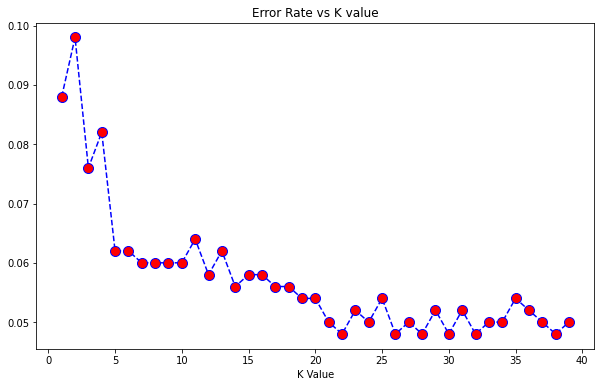

In [17]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle = 'dashed',marker = 'o',markerfacecolor='red',markersize=10)
plt.xlabel('K Value')
plt.title('Error Rate vs K value')